In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
liana = pd.read_csv('processed_data/03-LR_network_visualisation/03k_LIANA_DLPFC/LIANA_outputs_DLPFC.csv') # Supplementary table 4 from Huuki-Myers et al, bioRxiv, 2023

,source,target,ligand.complex,receptor.complex,aggregate_rank,mean_rank,natmi.edge_specificity,natmi.rank,connectome.weight_sc,connectome.rank,logfc.logfc_comb,logfc.rank,sca.LRscore,sca.rank,cellphonedb.pvalue,cellphonedb.rank
0,Micro,Micro,C3,ITGAX,7.790000e-14,5769.7,0.837635,1.0,4.046162,1.0,3.275835,1.0,0.918978,5371.0,0,23474.5
1,Micro,Micro,C3,ITGAM,4.990000e-12,6638.9,0.800695,3.0,3.626720,2.0,2.742322,4.0,0.894816,9711.0,0,23474.5
2,OPC,Micro,VCAN,TLR2,2.630000e-10,6099.9,0.646173,15.0,3.363127,3.0,2.599023,8.0,0.909757,6999.0,0,23474.5
3,Micro,Micro,MRC1,PTPRC,3.830000e-10,6871.1,0.723495,9.0,3.317336,4.0,2.461651,17.0,0.888751,10851.0,0,23474.5
4,Oligo,Micro,CD22,PTPRC,8.300000e-10,6494.7,0.653703,12.0,2.471209,22.0,2.448207,18.0,0.898667,8947.0,0,23474.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,Inhib,Excit_L4,LGI2,ADAM23,9.986194e-03,16449.5,0.029678,6865.0,0.515844,12577.0,0.094121,12035.0,0.814462,27296.0,0,23474.5
6584,OPC,Inhib,COL4A3,ITGA10_ITGB1,9.989266e-03,16498.9,0.039609,4415.0,0.814722,5095.0,0.070549,12578.0,0.769675,36932.0,0,23474.5
6585,EndoMural,Excit_L3,COL4A2,ITGA9_ITGB1,9.992553e-03,13239.9,0.027637,7551.0,0.669522,7902.0,0.663938,3570.0,0.831130,23702.0,0,23474.5
6586,Excit_L3/4/5,Excit_L5,FGF13,FGFR1,9.996569e-03,19234.1,0.015367,16522.0,0.467698,14549.0,-0.081634,16741.0,0.825650,24884.0,0,23474.5


0.1
(1210, 1)
(2740, 16)


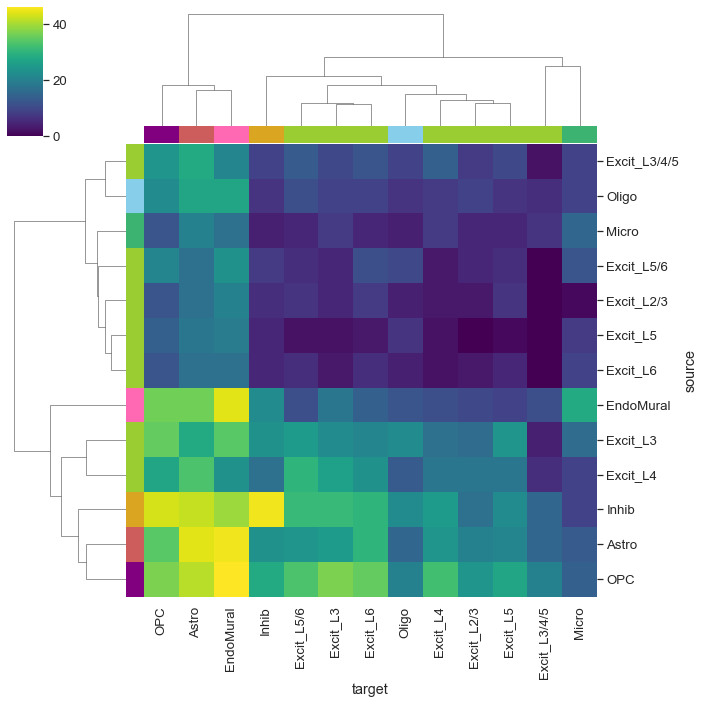

0.4
(865, 1)
(2263, 16)


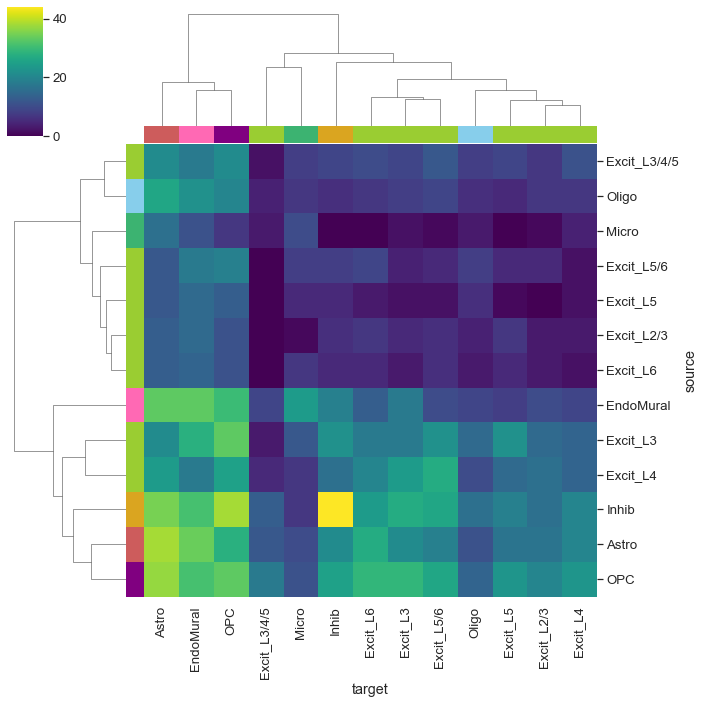

0.7
(128, 1)
(272, 16)


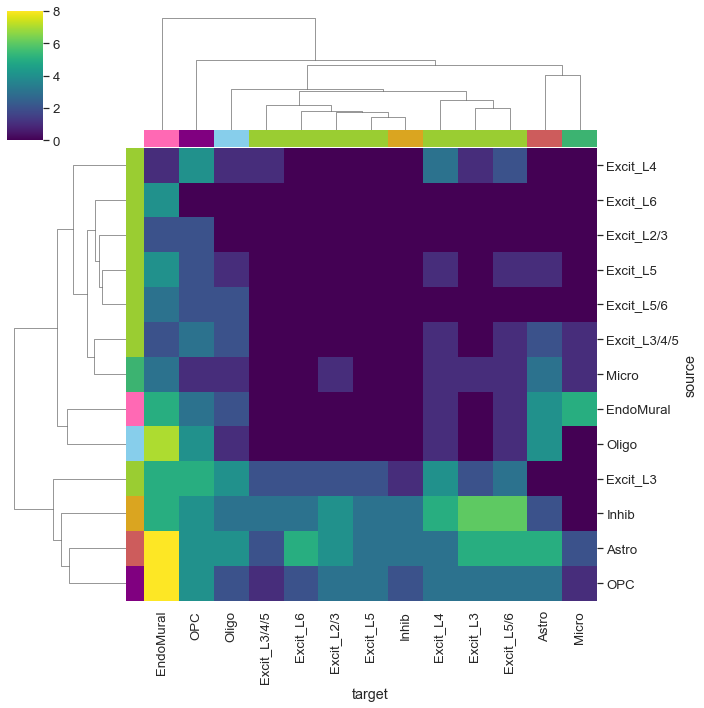

In [24]:
lut = {'Micro': 'mediumseagreen', 
        'OPC': 'purple', 
        'Oligo': 'skyblue', 
        'Astro': 'indianred', 
        'EndoMural': 'hotpink', 
        'Excit_L2/3': 'yellowgreen',
       'Inhib': 'goldenrod', 
       'Excit_L3': 'yellowgreen', 
       'Excit_L3/4/5': 'yellowgreen', 
       'Excit_L5/6': 'yellowgreen', 
       'Excit_L4': 'yellowgreen',
       'Excit_L6': 'yellowgreen', 
       'Excit_L5': 'yellowgreen'}
row_colors = df.columns.unique().map(lut)


reslist = ['0.1', '0.4', '0.7']
sns.set(font_scale = 1.2)
for res in range(0,len(reslist)):
    print(reslist[res])
    top = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], sep = ',', index_col = 0)
    print(np.shape(top))
    liana_subset = liana[(liana['receptor.complex'].isin(top['0'])) & (liana['ligand.complex'].isin(top['0']))]
    print(np.shape(liana_subset))
    df = pd.crosstab(liana_subset.source, liana_subset.target)
    sns.clustermap(df, row_colors = row_colors, col_colors = row_colors, cmap = 'viridis')
    plt.savefig('plots/03-LR_network_visualisation/03k_LIANA_DLPFC/cellcell_comms_LIANA_snrnaseq_DLPFC_%s.png' % reslist[res], dpi = 300, bbox_inches = 'tight')
    plt.show()